In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Step 2: Load the dataset
file_path = "Online retail.xlsx"
df = pd.read_excel(file_path, header=None)

In [3]:
# 1.2 Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB
None


In [4]:
print(df.head())

                                                   0
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...


In [5]:
# Rename the column
df.columns = ["Transactions"]

In [6]:
# Convert each transaction into a list of items
df["Transactions"] = df["Transactions"].apply(lambda x: str(x).split(","))

In [7]:
# Convert transactions into a format suitable for Apriori
te = TransactionEncoder()
te_ary = te.fit(df["Transactions"]).transform(df["Transactions"])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [8]:
# Define different values of min_support and confidence thresholds
support_values = [0.01, 0.02, 0.03, 0.05]
confidence_values = [0.2, 0.4, 0.6, 0.8]

In [9]:
# Store results
rule_counts = []

In [10]:
# Loop through different support and confidence values
for support in support_values:
    for confidence in confidence_values:
        # Apply Apriori algorithm
        frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)
        
        # Generate association rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        
        # Store results
        rule_counts.append((support, confidence, len(rules)))

In [11]:
# Convert results to a DataFrame
results_df = pd.DataFrame(rule_counts, columns=["Support", "Confidence", "Num_Rules"])

In [13]:
# Visualization: Heatmap of rules count
pivot_table = results_df.pivot(index="Support", columns="Confidence", values="Num_Rules")

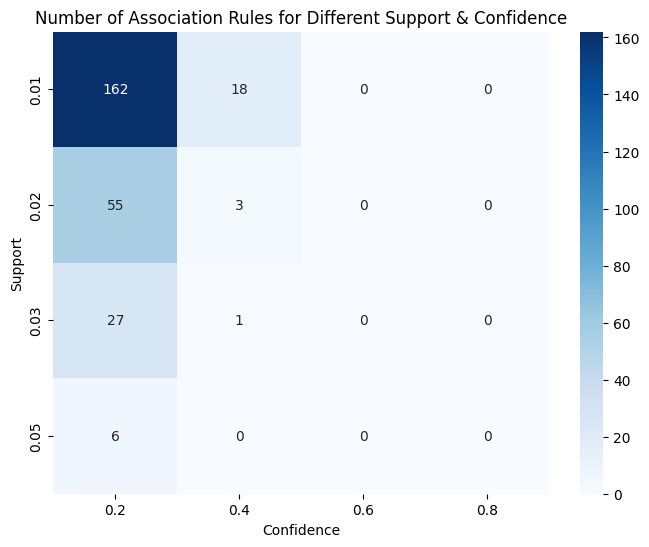

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
plt.title("Number of Association Rules for Different Support & Confidence")
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.show()

In [15]:
# Display top rules with high confidence
top_rules = results_df.sort_values(by="Num_Rules", ascending=False).head(5)
print("Top 5 configurations generating the most rules:\n", top_rules)

Top 5 configurations generating the most rules:
     Support  Confidence  Num_Rules
0      0.01         0.2        162
4      0.02         0.2         55
8      0.03         0.2         27
1      0.01         0.4         18
12     0.05         0.2          6


# What is Lift and Why is it Important in Association Rules?

Lift measures how much more likely two items are bought together compared to if they were bought separately. It helps us understand if there is a real relationship between items. A lift value greater than 1 means the items are more likely to be bought together than by chance. If lift is close to 1, the items are bought together randomly. A high lift value shows strong associations, making it useful for recommending products in market basket analysis.



# What is Support and Confidence? How Do You Calculate Them?

Support tells us how often an item or item pair appears in all transactions. It is calculated as:

Support = Transactions containing item(s) / Total transactions
​
 
Higher support means the item combination is common.


Confidence measures how often a rule (like "if A, then B") is correct. It is calculated as:

Confidence = Transactions containing both A and B / Transactions containing A
​ 
Higher confidence means the rule is more reliable for making predictions.

# What Are Some Limitations or Challenges of Association Rule Mining?\

One challenge of association rule mining is that it can generate too many rules, making it hard to find useful ones. Another issue is that rules with high confidence may still not be meaningful if they happen just by chance. Also, setting the right support and confidence thresholds is difficult because too high a value may miss important patterns, while too low a value may include weak rules. Lastly, it works best with structured transaction data but struggles with unstructured or complex datasets.